In [1]:
import numpy as np
import torch 
import torch.optim as optim 
import torch.functional as F 
from torch.utils.data import DataLoader , TensorDataset 

from sklearn.datasets  import make_moons
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , roc_auc_score , precision_recall_curve , auc 


In [3]:
from stepbystep_v0 import StepByStep

Data Generation 

In [5]:
X , y = make_moons(n_samples =  100 , noise = 0.3 , random_state = 0 )

In [7]:
import matplotlib.pyplot as plt 

In [11]:
#train test split 
X_train  , X_val , y_train , y_val = train_test_split(X , y , test_size= .2 , random_state= 42)

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_val

array([[-1.48388750e+00,  5.29504881e-01],
       [-1.08648822e+00,  8.40555023e-01],
       [-2.52853905e-01,  1.14745911e+00],
       [ 4.99894968e-01,  2.10892151e+00],
       [ 6.04507223e-01,  3.00405545e-01],
       [ 6.03649707e-01, -1.50131768e+00],
       [ 2.28903721e-01,  9.73741969e-01],
       [-6.73921027e-01,  1.85784294e+00],
       [-8.28854726e-01,  7.24783210e-01],
       [-4.88004786e-01,  1.39404445e+00],
       [-7.83061966e-01,  1.02021094e+00],
       [-2.18775811e-03, -6.39576183e-01],
       [ 1.69854599e+00, -1.56632976e-01],
       [-6.21117964e-02, -9.60991774e-01],
       [ 1.30834765e+00, -1.14065893e+00],
       [ 3.88152426e-01, -1.34615920e+00],
       [-1.42070917e-01,  1.62513541e+00],
       [ 1.38700375e+00,  4.46147207e-01],
       [ 1.12442435e+00, -1.71786499e+00],
       [ 6.36962637e-01, -2.23731796e+00]])

<Axes: >

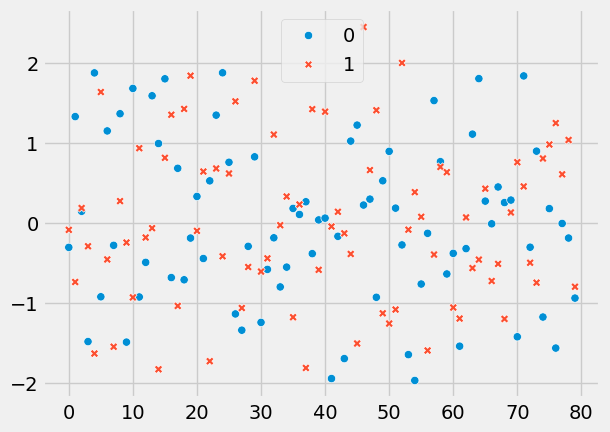

In [23]:
import seaborn as sns
sns.scatterplot(X_train)
# plt.ylim(-2 , 2)
# plt.xlim(-2 , 4)

In [33]:
X_train.shape

(80, 2)

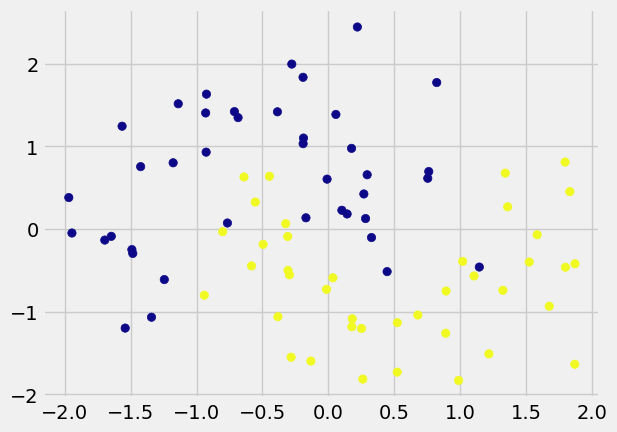

In [46]:
plt.scatter(X_train[: , 0] , X_train[: , 1] , c = y_train ,  cmap = 'plasma' )
plt.show()

In [49]:
X_val.shape

(20, 2)

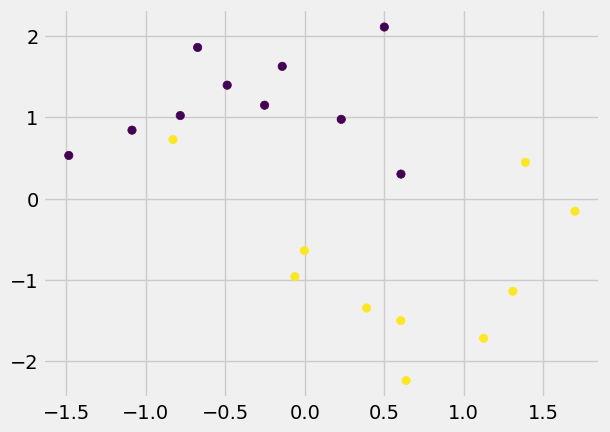

In [55]:
plt.scatter(X_val[: , 0] , X_val[: , 1]  , c = y_val )

In [59]:
torch.manual_seed(42)
#convert numpy into tenor 
X_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train ).reshape(-1 , 1).float()

X_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val ).reshape(-1 , 1).float()


#builds datasets containng all the datapoints
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor , y_val_tensor)

#builds data loader 
train_loader = DataLoader(
    dataset= train_dataset , 
    shuffle =  True , 
    batch_size = 16 , 

)

val_loader = DataLoader(
    dataset= val_dataset , 
    batch_size=  16
)

